In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/MyDrive/Exitdf.csv')
df.head()



,Unnamed: 0,PersonalStatement,Exit
0,0,I believe I am an ideal candidate for this cou...,Non-Exit
1,1,I have been fascinated with forensic science f...,Non-Exit
2,2,I would like to study Electronic Engineering a...,Non-Exit
3,3,Gaining expert knowledge of both law and Busin...,Non-Exit
4,4,"My passion for History began at a young age, w...",Non-Exit


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df['Exit'].value_counts()


Non-Exit    4485
Exit         316
Name: Exit, dtype: int64

Text(0.5, 1.0, 'Proportion Target Class')

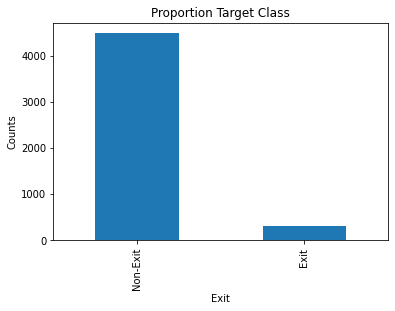

In [ ]:
df["Exit"].value_counts().plot(kind='bar')
plt.xlabel("Exit")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

In [ ]:
#renaming the 'Exit' values in Exit column to a numeric value of 1
df['Exit'] = df['Exit'].replace(['Exit'],0)

In [ ]:
#renaming the 'Non-Exit' values in Exit column to a numeric value of 0

df['Exit'] = df['Exit'].replace(['Non-Exit'],1)


#**Text Mining**
In this step we change text to tokens and convertion all of the words to lower case. Next we remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.

The function to remove punctuation and change to tokens:

In [ ]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

In [ ]:
df['PersonalSt'] = df['PersonalStatement'].apply(tokens)
df.head()

,PersonalStatement,Exit,PersonalSt
0,I believe I am an ideal candidate for this cou...,1,i believe i am an ideal candidate for this cou...
1,I have been fascinated with forensic science f...,1,i have been fascinated with forensic science f...
2,I would like to study Electronic Engineering a...,1,i would like to study electronic engineering a...
3,Gaining expert knowledge of both law and Busin...,1,gaining expert knowledge of both law and busin...
4,"My passion for History began at a young age, w...",1,my passion for history began at a young age wi...


In [ ]:
df['PersonalSt'] = df['PersonalSt'].astype(str)


**Stop word**
First we extracting the stopwords from nltk library, then we adding some clothing stopwords and build function to remove stop words:

In [ ]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


**Normalization**

The next step is the normalization of words in the corpus by transform all of different forms of the word into one. The two methods that exist for this purpose are Stemming and Lemmatization. We used the Lemmatization one.

In [ ]:
lem = WordNetLemmatizer()

def lemma(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [ ]:
 import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df['PersonalSt'] = df['PersonalSt'].apply(lemma)
df.head()

,PersonalStatement,Exit,PersonalSt
0,I believe I am an ideal candidate for this cou...,1,i believe i am an ideal candidate for this cou...
1,I have been fascinated with forensic science f...,1,i have been fascinated with forensic science f...
2,I would like to study Electronic Engineering a...,1,i would like to study electronic engineering a...
3,Gaining expert knowledge of both law and Busin...,1,gaining expert knowledge of both law and busin...
4,"My passion for History began at a young age, w...",1,my passion for history began at a young age wi...


In [ ]:
df['PersonalSt'][1]


'i have been fascinated with forensic science for the past three year i ve always valued science throughout gcse s and a level in particular biology a i am enthralled by human and plant biology i think the subject knowledge and laboratory skill i have learned will help understanding forensic science even further i m applying to a forensic science course a it compels me to take on a challenge of solving problem i think my a level are an appropriate combination to apply for this course i m captivated by fingerprint and how our fingerprint are what make u unique from one another i found a ted conference your fingerprint reveal more than you think simona francese which explained how sample are sent to the laboratory to help with the investigation of the crime where mass spectrometry imagining is used to get specific desorption of the molecule from the print and analyse what molecule are presented on the sample i am currently studying biology sociology and psychology in biology i have learn

**WordCloud - Repetition of words**
Now we create a Word Clouds for reviews, representing most common words in each target class.

Word cloud is a excellent way to represent text data, where the size and color of each word appears in the wordcloud show its frequency or importance.

In [ ]:

positive = df[df.Exit== 1]
negative = df[df.Exit== 0]
positive.head()

,PersonalStatement,Exit,PersonalSt
0,I believe I am an ideal candidate for this cou...,1,i believe i am an ideal candidate for this cou...
1,I have been fascinated with forensic science f...,1,i have been fascinated with forensic science f...
2,I would like to study Electronic Engineering a...,1,i would like to study electronic engineering a...
3,Gaining expert knowledge of both law and Busin...,1,gaining expert knowledge of both law and busin...
4,"My passion for History began at a young age, w...",1,my passion for history began at a young age wi...


In [ ]:
negative.head()


,PersonalStatement,Exit,PersonalSt
103,Following a discussion with the PD for both my...,0,following a discussion with the pd for both my...
109,Jurgen Klopp is a good coach in the modern era...,0,jurgen klopp is a good coach in the modern era...
110,I'm exploring two different courses in which I...,0,i m exploring two different course in which i ...
112,"Technology. To me, a wonderful thing to explor...",0,technology to me a wonderful thing to explore ...
124,"""When something is important enough, you do it...",0,when something is important enough you do it e...


In [ ]:
positive_words =[]

for review in positive.PersonalSt:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:48]

'i believe i am an ideal candidate for this cours'

In [ ]:
negative_words = []

for review in negative.PersonalSt:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'following a discussion with the pd for both my current programme and the programme i am applying for this personal statement is not required i am currently a student on the foundation degree in early childhood study degree course at the university of hull and i am expected to graduate in june the foundation degree in childhood study degree is a two year full time undergraduate programme which enables student to develop an insight into education and ea'

**Most Common words in Personal Statement Data**



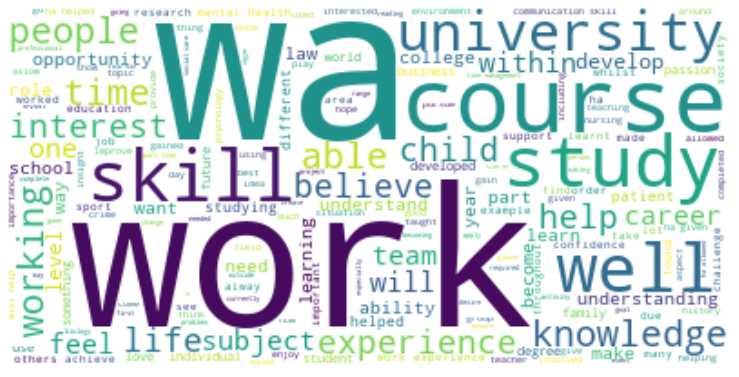

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Most Common words in not Recommended Review**



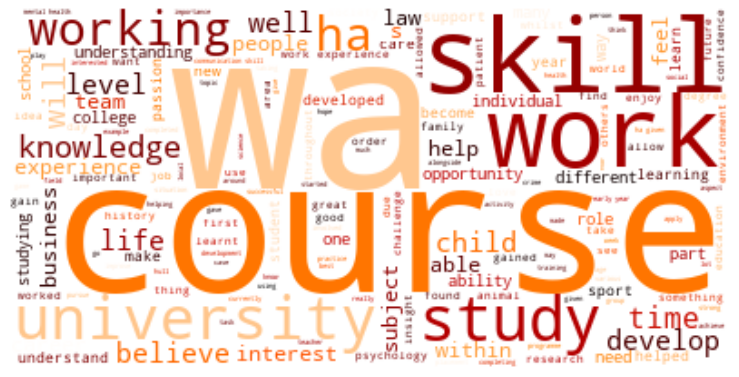

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Models**

We use the following classification models:

Logistic Regression,
Naive Bayes,
Support Vector Machine,
Random Forest,
Ada Boosting.
To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
X = df['PersonalSt']
y = df['Exit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
#In the next step we create a numerical feature vector for each document

vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


61212

**Logistic regression**
Now we train the model with n-grams:

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

ytest = np.array(y_test)
predictions = model.predict(vect.transform(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(ytest, predictions))

accuracy 0.9406867845993756
              precision    recall  f1-score   support

           0       0.50      0.09      0.15        57
           1       0.95      0.99      0.97       904

    accuracy                           0.94       961
   macro avg       0.72      0.54      0.56       961
weighted avg       0.92      0.94      0.92       961



**Naive Bayes**
To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn.

In [ ]:
model_nb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf',MultinomialNB()),
                   ])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.9406867845993756
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.94      1.00      0.97       904

    accuracy                           0.94       961
   macro avg       0.47      0.50      0.48       961
weighted avg       0.88      0.94      0.91       961



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Support Vector Machine (SVM)**


In [ ]:
model_svm = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-svm',SGDClassifier(loss='hinge',penalty='l2', alpha=1e-3, random_state=42)),
                    ])

model_svm.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_svm.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))

accuracy 0.9469302809573361
              precision    recall  f1-score   support

           0       1.00      0.11      0.19        57
           1       0.95      1.00      0.97       904

    accuracy                           0.95       961
   macro avg       0.97      0.55      0.58       961
weighted avg       0.95      0.95      0.93       961



**Random Forest**


In [ ]:
model_rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('clf-rf', RandomForestClassifier(n_estimators=50)),
                    ])

model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.9469302809573361
              precision    recall  f1-score   support

           0       1.00      0.11      0.19        57
           1       0.95      1.00      0.97       904

    accuracy                           0.95       961
   macro avg       0.97      0.55      0.58       961
weighted avg       0.95      0.95      0.93       961



**Ada Boosting**


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
                ('clf-ada', AdaBoostClassifier()),
                ])

ada.fit(X_train, y_train)
ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

In [ ]:
print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.9344432882414152
              precision    recall  f1-score   support

           0       0.38      0.16      0.22        57
           1       0.95      0.98      0.97       904

    accuracy                           0.93       961
   macro avg       0.66      0.57      0.59       961
weighted avg       0.91      0.93      0.92       961



Which one is the best Model?



In [ ]:
log_acc = accuracy_score(predictions, y_test)
nb_acc = accuracy_score(pred_y, y_test)
svm_acc = accuracy_score(y_predict, y_test)
rf_acc = accuracy_score(pred, y_test)
ada_acc = accuracy_score(ada_pred, y_test)

In [ ]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines', 'Random Forest', 'AdaBoosting'],
                      'Score': [log_acc, nb_acc, svm_acc, rf_acc, ada_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Support Vector Machines,0.946930
3,Random Forest,0.946930
0,Logistic Regression,0.940687
1,Naive Bayes,0.940687
4,AdaBoosting,0.934443


This part was aimed to used sentiment analysis to determine the if students exited or completed their university degree. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.946 for both Random Forest and Support Vector Machine method.